# Copulas for Weather Data Analysis

https://sdv.dev/Copulas/

A copula is a statistical tool used to model and analyze the dependence structure between random variables. The Python `copulas` library provides implementations of various copula models, allowing users to fit copulas to data, estimate their parameters, and generate new samples that preserve the dependencies observed in the original data.

Copulas are particularly useful in studying how weather variables covary because they allow for the modeling of complex dependencies between variables. Traditional correlation measures, such as Pearson's correlation, only capture linear relationships. In contrast, copulas can capture a wide range of dependency structures, including tail dependencies, which are important in understanding extreme weather events. By using copulas, researchers can better understand and simulate the joint behavior of weather variables, leading to more accurate predictions and risk assessments.

I don't know much about copulas, this notebook just explores some basic concepts, drawing from the [Introduction to Copulas](https://sdv.dev/Copulas/tutorials/01_Introduction_to_Copulas.html) pages of the python Copulas package.


Copulas might be applied to weather data scenarios.

**Scenario:** Imagine you have daily weather data for a particular location, including:

* **Rainfall:** Measured in millimeters (mm)
* **Temperature:** Measured in degrees Celsius (°C)

**Why Copulas Are Useful for Weather Data**

* **Non-linear Dependence:** Rainfall and temperature often have a complex, non-linear relationship. For example:
    * Heavy rainfall might be more likely with moderate temperatures.
    * Extreme temperatures (both high and low) might be associated with less rainfall.
* **Different Marginals:** Rainfall typically follows a skewed distribution (many days with little or no rain, some days with heavy rain), while temperature might be closer to a normal distribution.
* **Joint Modeling:** Understanding the joint behavior of rainfall and temperature is crucial for various applications, such as:
    * **Agricultural planning:** Predicting the likelihood of drought or excessive rain.
    * **Water resource management:** Forecasting reservoir levels and water availability.
    * **Climate modeling:** Studying the impact of climate change on weather patterns.

**Steps to Apply Copulas**

1. **Data Preparation:**
   * Collect and clean your weather data.
   * You might need to transform the data (e.g., take the logarithm of rainfall) to better fit certain marginal distributions.

2. **Marginal Modeling:**
   * Fit appropriate probability distributions to each variable separately.
   * For rainfall, you might use an exponential, gamma, or Weibull distribution.
   * For temperature, a normal or skewed normal distribution might be suitable.

3. **Copula Selection:**
   * Choose a copula function that can capture the dependence structure between rainfall and temperature. Some options include:
     * **Gaussian copula:** For symmetric dependence.
     * **t-copula:**  For stronger tail dependence (e.g., if extreme rainfall is more likely with extreme temperatures).
     * **Vine copulas:** For more complex, higher-dimensional dependencies (if you have more weather variables).

4. **Model Estimation:**
   * Estimate the parameters of the chosen copula using your weather data. This can be done using maximum likelihood estimation or other methods.

5. **Model Evaluation:**
   * Assess the goodness-of-fit of your copula model using various techniques, such as:
     * Visualizing the copula and comparing it to the empirical dependence structure.
     * Calculating goodness-of-fit statistics.

6. **Applications:**
   * Use the estimated copula model for:
     * Simulating realistic weather scenarios.
     * Calculating probabilities of joint events (e.g., the probability of having both high temperature and heavy rainfall on a given day).
     * Conditional probability estimation (e.g., the probability of heavy rainfall given a certain temperature).



Consider a Gaussian normal distribution.  Here is a plot of the probability distribution and the cumulative density function (CDF) for a normal distribution with mean 0 and standard deviation 1.

Notice that the CDF runs from 0 to 1.  That's key to understanding how we can transform a normal distribution into a uniform distribution.

In [8]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go 
import numpy as np
import scipy.stats as stats

def plot_cdf_pdf_plotly():
    # Generate 10000 evenly distributed values from -4 to 4
    x = np.linspace(-4.0, 4.0, 10000)

    # Compute their Probability Densities and Cumulative Distributions
    pdf = stats.norm.pdf(x)
    cdf = stats.norm.cdf(x)

    fig = make_subplots(rows=1, cols=2, subplot_titles=("PDF", "CDF"))

    fig.add_trace(
        go.Scatter(x=x, y=pdf),
        row=1, col=1
    )
    fig.update_xaxes(title_text="x", row=1, col=1)
    fig.update_yaxes(title_text="f(x)", row=1, col=1)

    fig.add_trace(
        go.Scatter(x=x, y=cdf),
        row=1, col=2
    )
    fig.update_xaxes(title_text="x", row=1, col=2)
    fig.update_yaxes(title_text="F(x)", row=1, col=2)

    # Update yaxis properties

    fig.update_layout(height=400, width=900, showlegend=False)
    fig.show()

plot_cdf_pdf_plotly()

### Probability Integral Transform

The probability integral transform is a key component in our toolkit for working with probability distributions. Suppose we have a random variable X
 that comes from a distribution with cumulative density function F(X)
. Then, we can define a random variable Y
 as

$$
Y=F(X)
$$
and prove that $Y$ follows a uniform distribution over the interval $[0.0,1.0]$
.

The figure below shows an example of this. We sample some data from a normal distribution and plot it on the left. Then, we use the CDF of the normal distribution to transform the data, plot it on the right, and observe that it resembles an uniform distribution.

In [10]:
X = stats.norm.rvs(size=10000)   # random sample from a gaussian.
X_pit = stats.norm.cdf(X)        # cdf(X) transforms to uniform distribution (see chart above)  

fig = make_subplots(rows=1, cols=2, subplot_titles=("Samples", "Transformed Samples"))

fig.add_trace(
    go.Histogram(x=X),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=X_pit),
    row=1, col=2
)

fig.update_layout(height=400, width=900, showlegend=False)
fig.show()

In [11]:
from copulas.datasets import sample_bivariate_age_income

df = sample_bivariate_age_income()
df.head()

,age,income
0,48.935913,399.161393
1,39.234323,364.225531
2,55.659901,406.475105
3,31.810637,341.276022
4,65.342336,414.347815


In [12]:
df.shape

(1000, 2)

In [13]:
from copulas.visualization import scatter_2d
scatter_2d(df)

In [14]:
from copulas.visualization import dist_1d
dist_1d(df['age'], title='Age')

In [15]:
dist_1d(df['income'], title='Income')

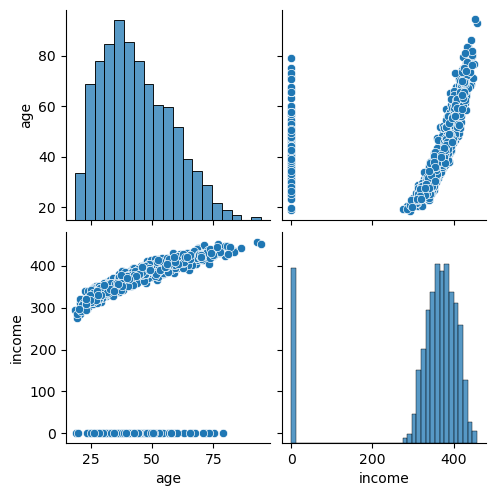

In [21]:
import seaborn as sns
sns.pairplot(df);

In [43]:
from copulas.multivariate import GaussianMultivariate
copula = GaussianMultivariate()
copula.fit(df)


c:\Users\jonat\miniforge3\Lib\site-packages\scipy\stats\_continuous_distns.py:785: RuntimeWarning:

invalid value encountered in sqrt



In [44]:
copula.correlation

,age,income
age,1.000000,0.659577
income,0.659577,1.000000


In [45]:

income_cdf = copula.univariates[1].cdf(df['income'])
dist_1d(income_cdf, title='income')

In [46]:
age_cdf = copula.univariates[0].cdf(df['age'])
dist_1d(age_cdf, title='Age')

Note that this transformed data looks much more uniform than the original values. Using this transformed data, we can then model the relationship between age and income more easily and generate some synthetic data.

## Create synthetic data

We can now use the model to create synthetic simulated data.

In [47]:
synthetic = copula.sample(len(df))
synthetic.head()

,age,income
0,57.891181,376.161741
1,69.133614,430.952549
2,39.969922,23.027614
3,35.323583,3.702262
4,55.469621,349.367744


In [48]:
from copulas.visualization import compare_2d

compare_2d(df, synthetic)

* **Simulation:** Once you have a well-fitted copula model, you can use it to simulate synthetic weather data that preserves the dependencies observed in historical data. This is crucial for:
    * **Ensemble forecasting:** Creating multiple possible future weather scenarios to assess uncertainty and improve prediction accuracy.
    * **Testing prediction models:** Evaluating the performance of different weather prediction models under various simulated conditions.

**3.  Improving Statistical Models:**

* **Input to Predictive Models:** The dependence structure captured by a copula can be used as input to other statistical or machine learning models that make actual weather predictions. This can improve the accuracy of these models by providing them with more information about the relationships between variables.

**4.  Extrapolating to Extremes:**

* **Tail Dependence:** Copulas, particularly those that model tail dependence, can help predict the likelihood of extreme weather events (e.g., heavy rainfall, heat waves) that are rare but have significant impacts.

**Limitations:**

* **Not a Standalone Predictor:** Copulas primarily focus on modeling dependence. They don't incorporate the physical processes that drive weather patterns. Therefore, they need to be combined with other meteorological data and forecasting techniques.
* **Data Requirements:** Accurate copula modeling requires sufficient historical weather data, which might not be available for all locations or variables.
* **Stationarity Assumption:** Copulas often assume that the dependence structure between variables remains stable over time. This might not hold true in the face of climate change, which can alter weather patterns.

**In conclusion:**

Copulas are not a magic bullet for weather prediction, but they offer a powerful tool to model dependencies between weather variables. When combined with other forecasting methods and meteorological knowledge, they can contribute to more accurate and reliable weather predictions, especially for extreme events and in understanding the impacts of climate change.
